In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [30]:
df.shape

(400, 5)

In [31]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [32]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [33]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [34]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [36]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [37]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [38]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df["Gender"]

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [39]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [40]:
df.boxplot("EstimatedSalary")

<Axes: >

In [41]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score


In [42]:
correlation_matrix=df.corr()
print(correlation_matrix)

                  User ID    Gender       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.025249 -0.000721         0.071097   0.007120
Gender          -0.025249  1.000000 -0.073741        -0.060435  -0.042469
Age             -0.000721 -0.073741  1.000000         0.155238   0.622454
EstimatedSalary  0.071097 -0.060435  0.155238         1.000000   0.362083
Purchased        0.007120 -0.042469  0.622454         0.362083   1.000000


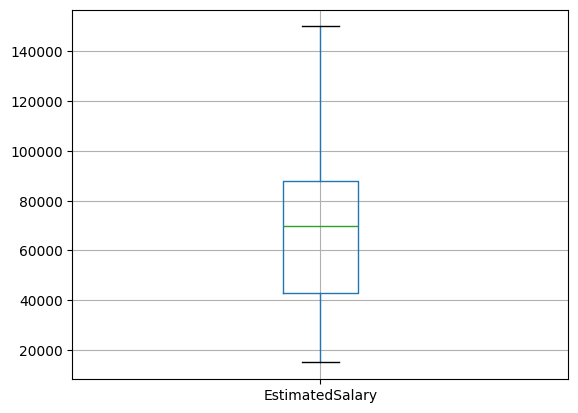

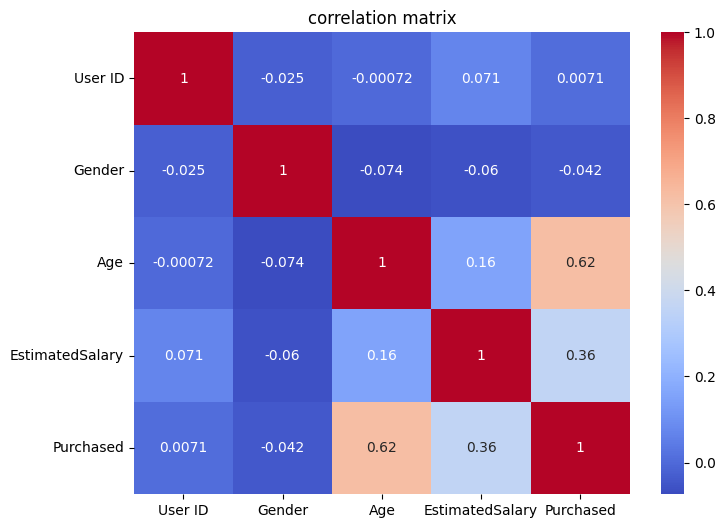

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

In [44]:
x=df[["Gender","Age","EstimatedSalary"]]
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [45]:
y=df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.transform(xtest)

In [48]:
best_k=1
best_accuracy=0
accuracies=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    accuracies.append(acc)
    print("k=",k,"accuracy=",acc)
    if acc>best_accuracy:
        best_accuracy=acc
        best_k=k

print("best k=",best_k,"with accuracy=",best_accuracy)


k= 1 accuracy= 0.825
k= 2 accuracy= 0.7875
k= 3 accuracy= 0.7875
k= 4 accuracy= 0.825
k= 5 accuracy= 0.8375
k= 6 accuracy= 0.875
k= 7 accuracy= 0.875
k= 8 accuracy= 0.8625
k= 9 accuracy= 0.8625
k= 10 accuracy= 0.8375
k= 11 accuracy= 0.8875
k= 12 accuracy= 0.8875
k= 13 accuracy= 0.875
k= 14 accuracy= 0.8625
k= 15 accuracy= 0.8375
k= 16 accuracy= 0.8625
k= 17 accuracy= 0.85
k= 18 accuracy= 0.85
k= 19 accuracy= 0.875
k= 20 accuracy= 0.85
best k= 11 with accuracy= 0.8875


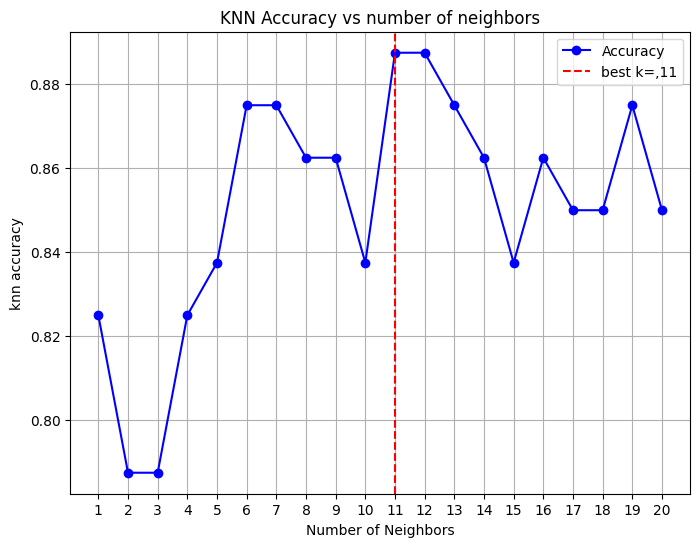

In [49]:
plt.figure(figsize=(8,6))
plt.plot(range(1,21),accuracies,marker="o",linestyle="-",color="b",label="Accuracy")
plt.axvline(best_k,color="r",linestyle="--",label=f"best k=,{best_k}")
plt.title("KNN Accuracy vs number of neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("knn accuracy")
plt.xticks(range(1,21))
plt.legend()
plt.grid(True)
plt.show()
           

In [50]:
final_knn=KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(xtrain,ytrain)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
ypred=final_knn.predict(xtest)
final_accuracy=accuracy_score(ytest,ypred)
print("Final KNN Model accuracy(k=",best_k,"):",final_accuracy)

Final KNN Model accuracy(k= 11 ): 0.8875


In [52]:
cm=confusion_matrix(ytest,ypred)
accuracy=accuracy_score(ytest,ypred)
precision=precision_score(ytest,ypred)
recall=recall_score(ytest,ypred)
error_rate=1-accuracy
print("confusion matrix:",cm)
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("error_rate:",error_rate)

confusion matrix: [[55  3]
 [ 6 16]]
accuracy: 0.8875
precision: 0.8421052631578947
recall: 0.7272727272727273
error_rate: 0.11250000000000004
